<a href="https://colab.research.google.com/github/BrandonBosire/Core-Week-4-/blob/main/Week_4_IP_(Brandon_Moreno).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Overview:
 
What follows is an attempt to carry out analysis measures in regard to the project where:

We will be working as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

The dataset and glossary to use for this project can be found here  [Link](https://bit.ly/DSCoreAutolibDataset) and here [Link](http://bit.ly/DSCoreAutolibDatasetGlossary) respectively.


###  Defining the Question

####  The Question
What is the correlation among the vehicle types?  

#### Metric for Success

- We will carry out EDA data analysis in order to dtermine how each variable affects the use of cabs throughout the data,in an attempt to be a able to make crucial conclusions on these factors as they arise.  

#### Understanding the context 
The provided dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging).

#### Recording the Experimental Design

Below is the expected flow of our work:

- Data Cleaning and Preparation
    - Load libraries and dataset.
    - Deal with missing values.
    - Deal with duplicated records.
    - Dealing with outliers and anomalies.
- Perform EDA.
    - Univariate Analysis.
    - Bivariate Analysis.
-Carry out hypothesis testing.
    - Data sampling.
    - Normality testing.
    - Statistical test.
    - Conclusions.

### Data relevance 
####Below are the dataset columns detailed, given their descriptions in an attempt to explain the dataset showing how relevant the data is in our research questions:
*   **Postal code** - Postal code of the area (in Paris).

*   **date** - Date of the row aggregation.

*   **n_daily_data_points** - Number of daily data poinst that were available for aggregation, that day.

*   **dayOfWeek** - Identifier of weekday (0: Monday -> 6: Sunday).

*   **day_type** - Weekday or weekend.

*   **BlueCars_taken_sum** - Number of bluecars taken that date in that area.

*   **BlueCars_returned_sum** - Number of bluecars returned that date in that area.

*   **Utilib_taken_sum** - Number of Utilib  taken that date in that area.

*   **Utilib_returned_sum** - Number of Utilib returned that date in that area.

*   **Utilib_14_taken_sum** - Number of Utilib 1.4 taken that date in that area.

*   **Utilib_14_returned_sum** -  Number of Utilib 1.4 returned that date in that area.

*   **Slots_freed_sum** - Number of recharging slots released that date in that area.

*   **Slots_taken_sum** - Number of rechargign slots taken that date in that area.


###Importing Libraries.

In [1]:
#Importing libraries we will use for data manipulation and visualization
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

###Loading datasets.

In [2]:
#The dataset.
df = pd.read_csv('/content/autolib_daily_events_postal_code.csv',)

###Previewing Dataset

In [6]:
#Checking the number of rows and columns in our dataset.
#
df.shape 

(16085, 13)

In [13]:
#Checking the column datatypes.
#
df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [15]:
#Converting day to date-time.
#
df['date']=pd.to_datetime(df['date'])
df.dtypes

Postal code                        int64
date                      datetime64[ns]
n_daily_data_points                int64
dayOfWeek                          int64
day_type                          object
BlueCars_taken_sum                 int64
BlueCars_returned_sum              int64
Utilib_taken_sum                   int64
Utilib_returned_sum                int64
Utilib_14_taken_sum                int64
Utilib_14_returned_sum             int64
Slots_freed_sum                    int64
Slots_taken_sum                    int64
dtype: object

In [4]:
#The top 10 rows.
#
df.head(10)


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
7,75001,1/8/2018,1438,0,weekday,84,83,3,3,10,10,14,15
8,75001,1/9/2018,1439,1,weekday,81,84,1,1,4,4,15,15
9,75001,1/10/2018,1440,2,weekday,88,85,5,5,11,11,23,22


In [5]:
#The bottom 10 rows.
#
df.tail(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16075,95880,6/10/2018,1440,6,weekend,34,32,0,0,1,0,0,0
16076,95880,6/11/2018,1440,0,weekday,17,18,0,0,0,0,0,0
16077,95880,6/12/2018,1439,1,weekday,25,25,0,0,0,0,0,0
16078,95880,6/13/2018,1440,2,weekday,12,13,0,0,1,1,0,0
16079,95880,6/14/2018,1439,3,weekday,15,13,0,0,0,0,0,0
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


###Data cleaning preparation:

In [7]:
#Checking on the statistical summary of the dataset.
#
df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [9]:
#Checking for null values.
#
df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [11]:
#Checking for duplicates.
#
df.duplicated().any()
#There are no duplicates.

False

In [16]:
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

##Univariate analysis
We will start by:

-Ploting histograms and distribution plots.

-Identifying measures of spread (variance, Kurtosis, Skew).

-Then give summary description on what these values mean.

###For Categorical data
We will plot countplots for:

-Day Type.

-Postal Adress

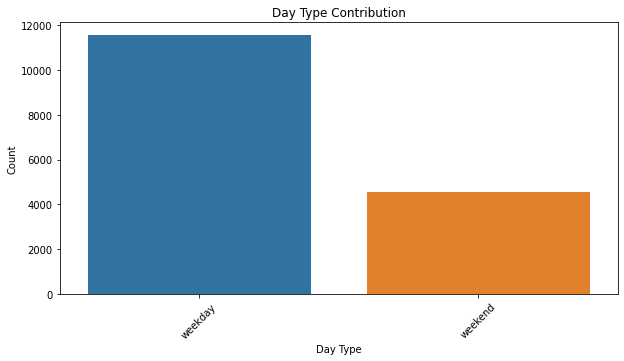

In [77]:
#Day type counts throughout the dataset
plt.figure(figsize=(10,5))
sns.countplot(x=df.day_type)

plt.xticks(rotation= 45)
plt.xlabel('Day Type')
plt.ylabel('Count')
plt.title('Day Type Contribution')
plt.show()

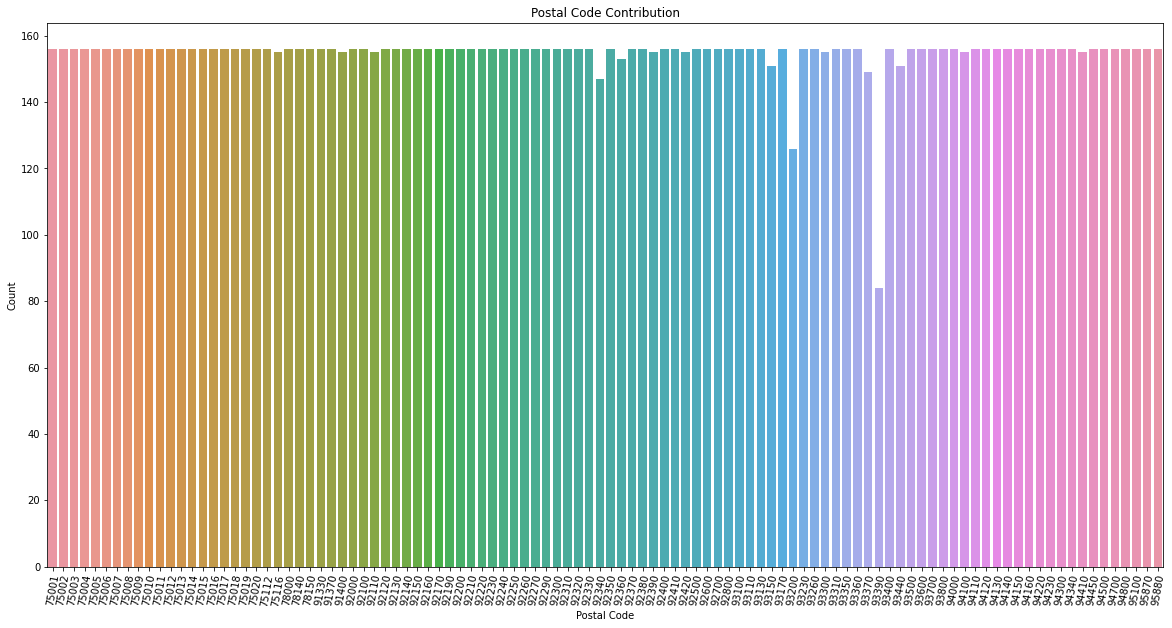

In [79]:
#Postal code counts throughout the dataset
plt.figure(figsize=(20,10))
sns.countplot(x=df['Postal code'])

plt.xticks(rotation= 80)
plt.xlabel('Postal Code')
plt.ylabel('Count')
plt.title('Postal Code Contribution')
plt.show()

It is noted that the postal code with the lowest contribution to the data collected is  93390.With a count less than half of those of the rest.

###For Numerical Data
We will:

-Plot distribution plots.

-Identifying measures of spread (variance, Kurtosis, Skew).

-Then give summary description on what these values mean.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


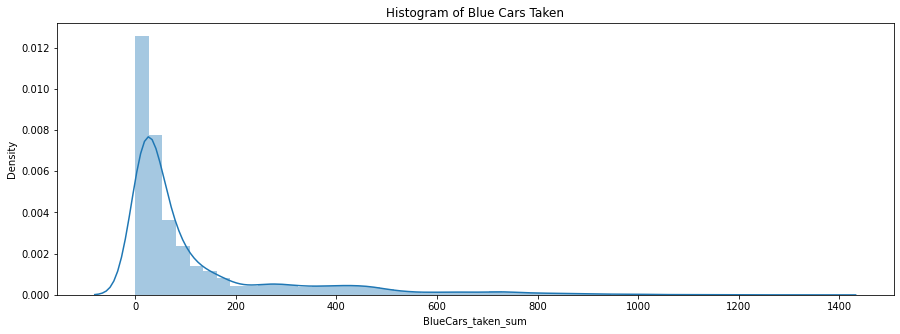

BlueCars Taken Variance : 34383.01611333789
BlueCars Taken Skew : 2.4063548974959086
BlueCars Taken Kurtosis : 6.172692305510042


In [51]:
plt.figure(figsize=(15,5))
sns.distplot(df.BlueCars_taken_sum, kde=True)
plt.title('Histogram of Blue Cars Taken')
plt.show();
print('BlueCars Taken Variance :',df.BlueCars_taken_sum.var())
print('BlueCars Taken Skew :',df.BlueCars_taken_sum.skew())
print('BlueCars Taken Kurtosis :',df.BlueCars_taken_sum.kurt())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


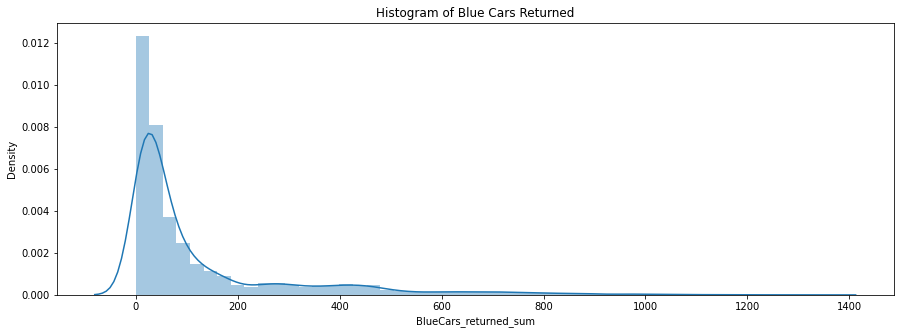

BlueCars Returned Variance : 34410.819413706275
BlueCars Returned Skew : 2.412084978838923
BlueCars Returned Kurtosis : 6.1862880957582345


In [50]:
plt.figure(figsize=(15,5))
sns.distplot(df.BlueCars_returned_sum)
plt.title('Histogram of Blue Cars Returned')
plt.show();
print('BlueCars Returned Variance :',df.BlueCars_returned_sum.var())
print('BlueCars Returned Skew :',df.BlueCars_returned_sum.skew())
print('BlueCars Returned Kurtosis :',df.BlueCars_returned_sum.kurt())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


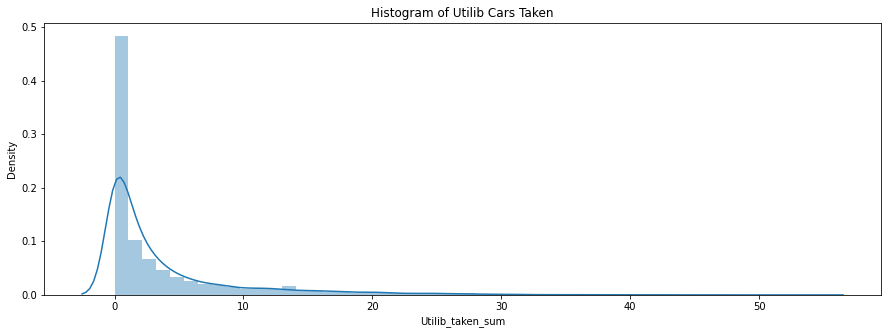

Utilib Cars Taken  Variance : 33.81489697737956
Utilib Cars Taken  Skew : 2.5568719194754777
Utilib Cars Taken  Kurtosis : 7.702361895243428


In [49]:
 plt.figure(figsize=(15,5))
sns.distplot(df.Utilib_taken_sum)
plt.title('Histogram of Utilib Cars Taken')
plt.show()
print('Utilib Cars Taken  Variance :',df.Utilib_taken_sum.var())
print('Utilib Cars Taken  Skew :',df.Utilib_taken_sum.skew())
print('Utilib Cars Taken  Kurtosis :',df.Utilib_taken_sum.kurt())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


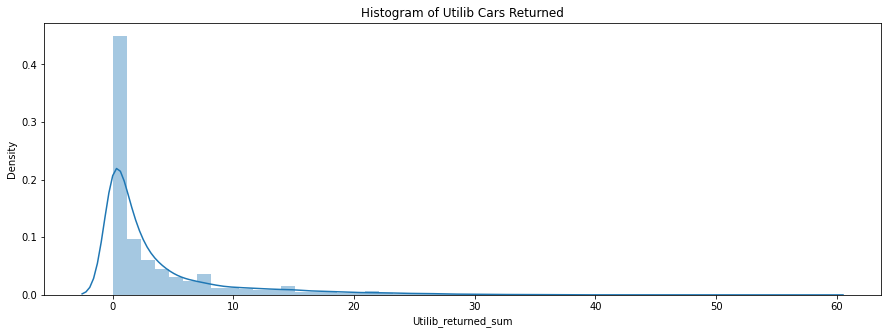

Utilib Cars Returned  Variance : 33.9263638975805
Utilib Cars Returned  Skew : 2.57866477971619
Utilib Cars Returned  Kurtosis : 7.93635700780893


In [48]:
 plt.figure(figsize=(15,5))
sns.distplot(df.Utilib_returned_sum)
plt.title('Histogram of Utilib Cars Returned')
plt.show()
print('Utilib Cars Returned  Variance :',df.Utilib_returned_sum.var())
print('Utilib Cars Returned  Skew :',df.Utilib_returned_sum.skew())
print('Utilib Cars Returned  Kurtosis :',df.Utilib_returned_sum.kurt())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


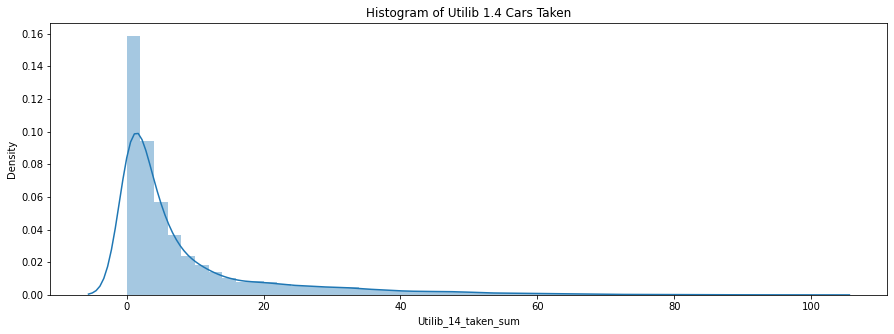

Utilib 1.4 Cars Taken  Variance : 165.63943017690403
Utilib 1.4 Cars Taken  Skew : 2.5109244534822923
Utilib 1.4 Cars Taken  Kurtosis : 7.18681525579947


In [47]:
 plt.figure(figsize=(15,5))
sns.distplot(df.Utilib_14_taken_sum)
plt.title('Histogram of Utilib 1.4 Cars Taken')
plt.show()
print('Utilib 1.4 Cars Taken  Variance :',df.Utilib_14_taken_sum.var())
print('Utilib 1.4 Cars Taken  Skew :',df.Utilib_14_taken_sum.skew())
print('Utilib 1.4 Cars Taken  Kurtosis :',df.Utilib_14_taken_sum.kurt())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


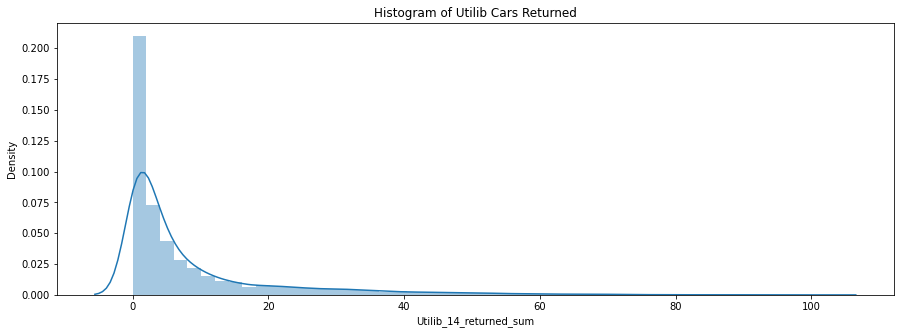

Utilib 1.4 Cars Returned  Variance : 165.61097920252672
Utilib 1.4 Cars Returned  Skew : 2.511487901149739
Utilib 1.4 Cars Returned  Kurtosis : 7.18546312191963


In [46]:
 plt.figure(figsize=(15,5))
sns.distplot(df.Utilib_14_returned_sum)
plt.title('Histogram of Utilib Cars Returned')
plt.show()
print('Utilib 1.4 Cars Returned  Variance :',df.Utilib_14_returned_sum.var())
print('Utilib 1.4 Cars Returned  Skew :',df.Utilib_14_returned_sum.skew())
print('Utilib 1.4 Cars Returned  Kurtosis :',df.Utilib_14_returned_sum.kurt())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


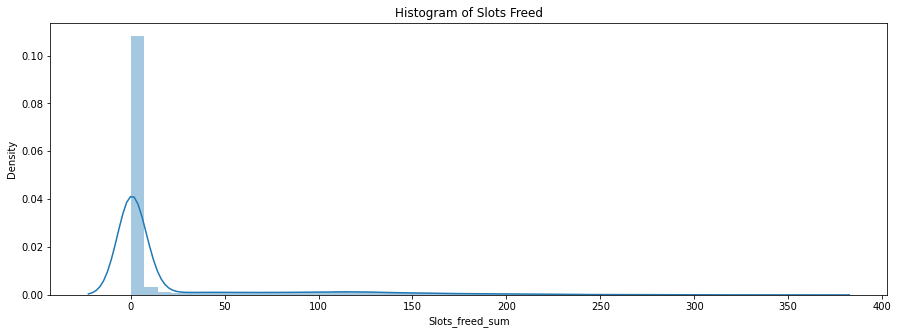

Slots Freed  Variance : 2716.52185037856
Slots Freed  Skew : 2.5974057870090994
Slots Freed  Kurtosis : 6.454514382612528


In [45]:
 plt.figure(figsize=(15,5))
sns.distplot(df.Slots_freed_sum)
plt.title('Histogram of Slots Freed')
plt.show()
print('Slots Freed  Variance :',df.Slots_freed_sum.var())
print('Slots Freed  Skew :',df.Slots_freed_sum.skew())
print('Slots Freed  Kurtosis :',df.Slots_freed_sum.kurt())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


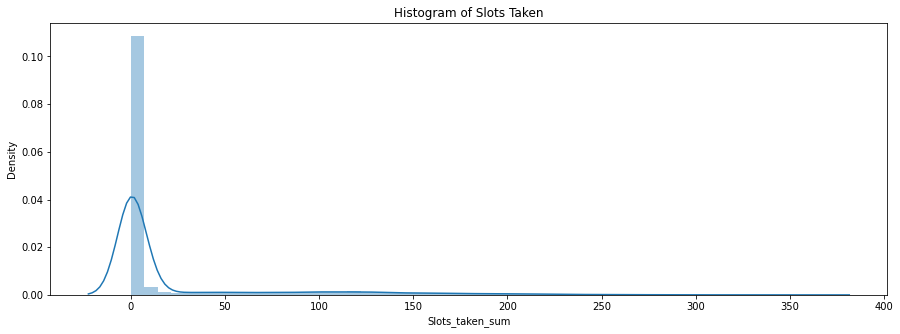

Slots Taken  Variance : 2719.2084312501315
Slots Taken  Skew : 2.5969043474634987
Slots Taken  Kurtosis : 6.442553073772169


In [44]:
 plt.figure(figsize=(15,5))
sns.distplot(df.Slots_taken_sum)
plt.title('Histogram of Slots Taken')
plt.show()
print('Slots Taken  Variance :',df.Slots_taken_sum.var())
print('Slots Taken  Skew :',df.Slots_taken_sum.skew())
print('Slots Taken  Kurtosis :',df.Slots_taken_sum.kurt())

A summary of univariate analysis shows that the majoritty of the data is highly skewed positively, and this is clearly due to the presence of a multitude of outliers due to the low values of means among the data, none of which are anomalies. 

##Bivariate Analysis
Here will carry out:

-Correlation of numerical data.

-Scatterplots



###For Categorical Data
We will use crosstable to summarise between:

-Day_type and the cars.

In [147]:
#The tabulation for vehicles taken.
#
day=df.groupby(['day_type'])
day['BlueCars_taken_sum','Utilib_taken_sum','Utilib_14_taken_sum'].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,day_type,BlueCars_taken_sum,Utilib_taken_sum,Utilib_14_taken_sum
0,weekday,1339435,39538,92341
1,weekend,686100,19949,45999


In [148]:
#The tabulation for vehicles returned.
#
day=df.groupby(['day_type'])
day['BlueCars_returned_sum','Utilib_returned_sum','Utilib_14_returned_sum'].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,day_type,BlueCars_returned_sum,Utilib_returned_sum,Utilib_14_returned_sum
0,weekday,1334941,39453,92069
1,weekend,690365,20047,46249


###For Numerical Data

In [83]:
#Correlation matrix of numerical data:

corr=df.corr()
corr

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
Postal code,1.000000,0.000432,0.000343,-0.698020,-0.697519,-0.625521,-0.624786,-0.656744,-0.656516,-0.749528,-0.749157
n_daily_data_points,0.000432,1.000000,0.002039,0.029411,0.030063,0.022669,0.023322,0.025738,0.026351,0.020873,0.021169
dayOfWeek,0.000343,0.002039,1.000000,0.079649,0.081954,0.069295,0.071713,0.068790,0.071279,0.049960,0.050468
BlueCars_taken_sum,-0.698020,0.029411,0.079649,1.000000,0.998660,0.893833,0.892850,0.940946,0.940757,0.948575,0.947996
BlueCars_returned_sum,-0.697519,0.030063,0.081954,0.998660,1.000000,0.893613,0.893268,0.940542,0.941117,0.948258,0.948771
Utilib_taken_sum,-0.625521,0.022669,0.069295,0.893833,0.893613,1.000000,0.981982,0.847519,0.846304,0.853760,0.853049
Utilib_returned_sum,-0.624786,0.023322,0.071713,0.892850,0.893268,0.981982,1.000000,0.845645,0.845306,0.852939,0.852936
Utilib_14_taken_sum,-0.656744,0.025738,0.068790,0.940946,0.940542,0.847519,0.845645,1.000000,0.992062,0.899232,0.898719
Utilib_14_returned_sum,-0.656516,0.026351,0.071279,0.940757,0.941117,0.846304,0.845306,0.992062,1.000000,0.899442,0.899777
Slots_freed_sum,-0.749528,0.020873,0.049960,0.948575,0.948258,0.853760,0.852939,0.899232,0.899442,1.000000,0.999221


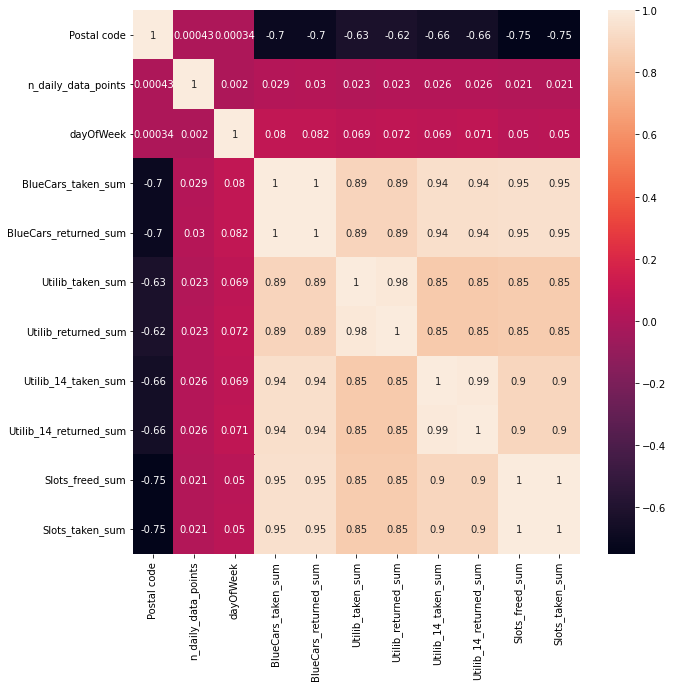

In [86]:
#A heatmap for visualization:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True )

Text(0.5, 1.0, 'Utilib Taken vs BlueCars Taken')

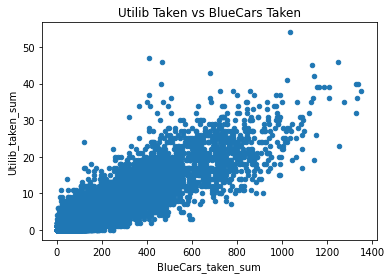

In [105]:
#A scatterplot of Utilib vs Blue Cars
df.plot(x = 'BlueCars_taken_sum', y = 'Utilib_taken_sum', kind='scatter')
plt.title('Utilib Taken vs BlueCars Taken')


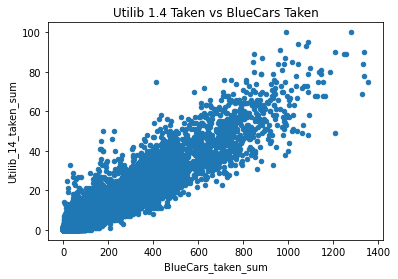

In [115]:
df.plot(x = 'BlueCars_taken_sum', y = 'Utilib_14_taken_sum', kind='scatter')
plt.title('Utilib 1.4 Taken vs BlueCars Taken');


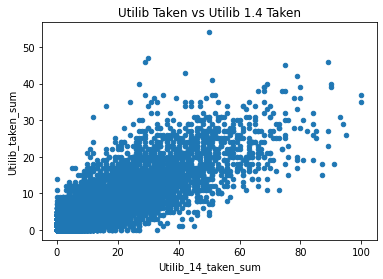

In [116]:
df.plot(x = 'Utilib_14_taken_sum', y = 'Utilib_taken_sum', kind='scatter')
plt.title('Utilib Taken vs Utilib 1.4 Taken');

From both the heatmap and the scatterplots, there is a consensus regarding the correlation values amongst the datas.This being a high negative or high positive, except in the cases of the data point per date, and the day of the week, these have very small and negligible values.

We also note from the tabulation that the weekday has the most activity overall.